# **Random Forest Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump

In [2]:
X_train = pd.read_csv('../data/processed/train_test_madrid/Xtrain.csv')
X_test = pd.read_csv('../data/processed/train_test_madrid/Xtest.csv')

y_train = pd.read_csv('../data/processed/train_test_madrid/ytrain.csv')
y_test = pd.read_csv('../data/processed/train_test_madrid/ytest.csv')

In [3]:
X_test

,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
0,15.666667,4,5,0,1
1,17.750000,4,2,0,1
2,19.333333,4,5,0,1
3,23.666667,4,5,0,0
4,22.916667,4,2,0,0
...,...,...,...,...,...
16175,28.406250,4,4,0,1
16176,2.625000,22,6,1,1
16177,36.583333,5,2,0,0
16178,7.166667,15,6,0,0


In [4]:
y_test

,PELIGROSIDAD_N
0,Alta
1,Alta
2,Alta
3,Alta
4,Alta
...,...
16175,Alta
16176,Normal
16177,Alta
16178,Alta


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state= 23)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=60, random_state=23)

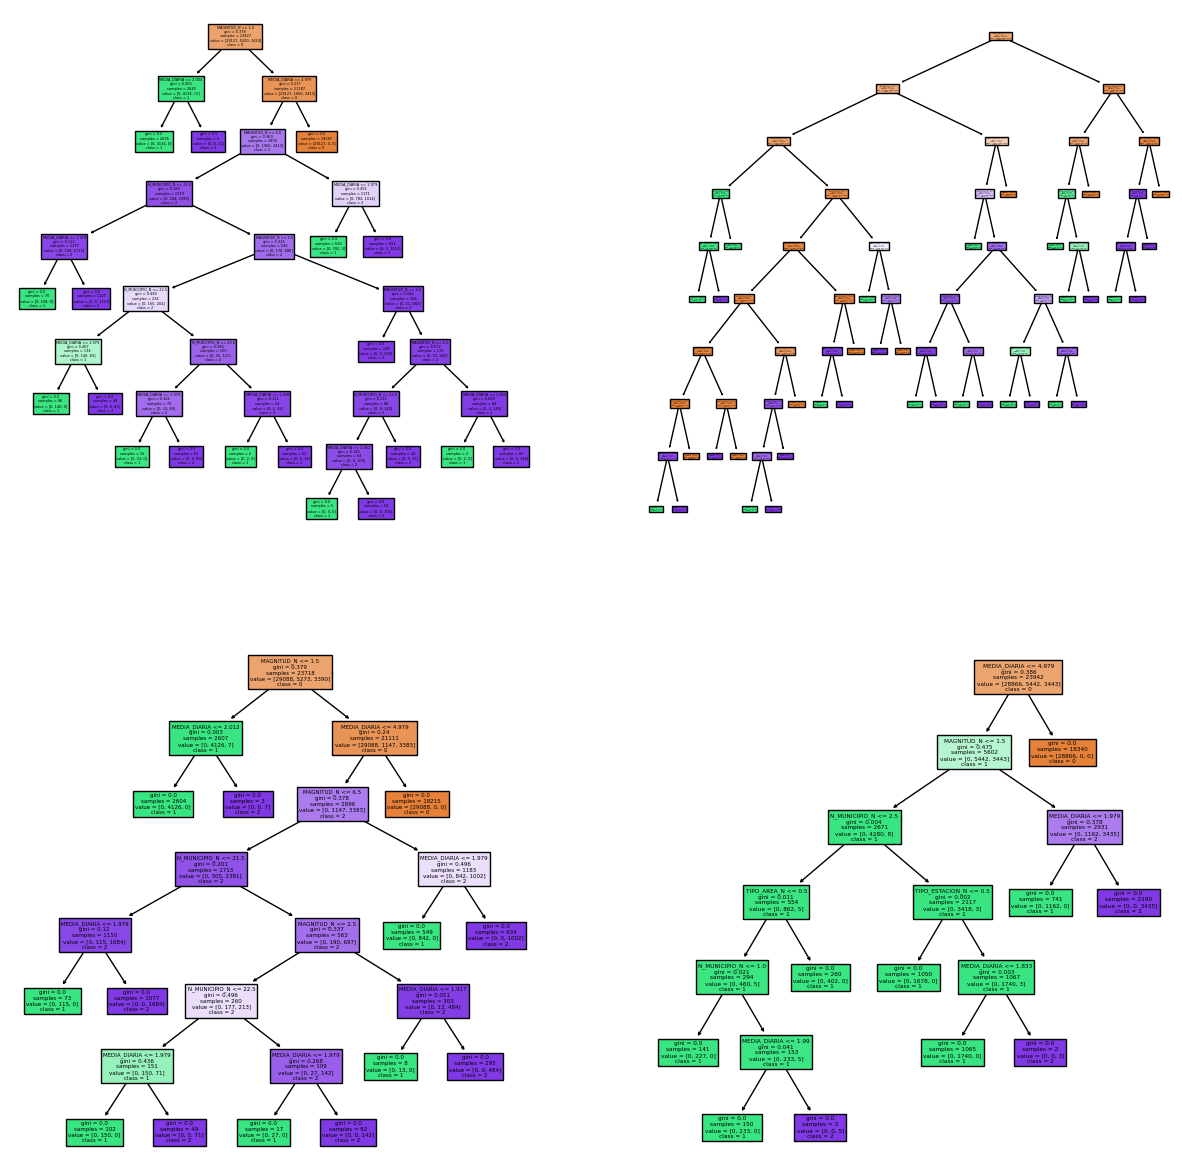

In [6]:
from sklearn import tree

fig, axis = plt.subplots (2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)

plt.show()

In [11]:
y_pred = model.predict(X_test)
y_pred

array(['Alta', 'Alta', 'Alta', ..., 'Alta', 'Alta', 'Alta'], dtype=object)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [9]:
dump(model, open("../models/RandomForestMadrid_23.pk", "wb"))